In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# step1:- Define the objective of the problems
# create a classification model which can predict the survival of passenger
# aboard the tiitanic

# step 2: data Gathering
#https://www.kaggle.com/competitions/titanic/data

# Variable	Definition	Key
# survival	Survival	0 = No, 1 = Yes
# pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
# sex	Sex	
# Age	Age in years	
# sibsp	# of siblings / spouses aboard the Titanic	
# parch	# of parents / children aboard the Titanic	
# ticket	Ticket number	
# fare	Passenger fare	
# cabin	Cabin number	
# embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import KNN and accuracy score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratery data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


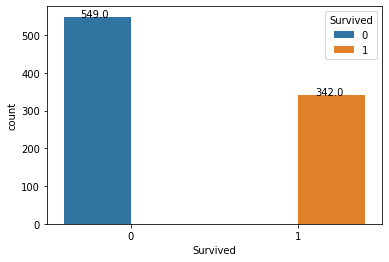

In [ ]:
ax=sns.countplot("Survived",data=df,hue="Survived")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.10,p.get_height()+0.1))
    

In [ ]:
#No of Survival are less as compare to not survived

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


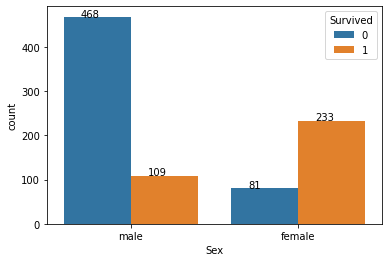

In [ ]:
ax=sns.countplot("Sex",data=df,hue="Survived")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.10,p.get_height()+0.1))

In [ ]:
# Gender plays important role
# male: Survival chances are less
# female: Survival chances are more

In [ ]:
# Male Passanger Count=?
# female Passanger Count=?
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
# No  Male Passanger survived=?
# No  Male Passanger notsurvived=?
df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [ ]:
df['Survived'][df['Sex']=='male'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [ ]:
# No  female Passanger survived=?
# No  female Passanger notsurvived=?

In [ ]:
df['Survived'][df['Sex']=='female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


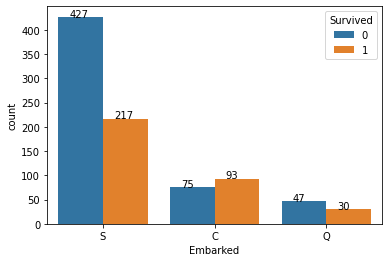

In [ ]:
ax=sns.countplot("Embarked",data=df,hue="Survived")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.10,p.get_height()+0.1))

In [ ]:
# C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
# Finder Embarked location  Wise Count
# S  Male Passanger survived=?
# S  Male Passanger notsurvived=?

# S  female Passanger survived=?
# S  female Passanger notsurvived=?

# C  Male Passanger survived=?
# C  Male Passanger notsurvived=?

# C  female Passanger survived=?
# C  female Passanger notsurvived=?

# Q  Male Passanger survived=?
# Q  Male Passanger notsurvived=?

# Q  female Passanger survived=?
# Q  female Passanger notsurvived=?
df.groupby(['Survived','Sex','Embarked'])['Survived'].count()

Survived  Sex     Embarked
0         female  C             9
                  Q             9
                  S            63
          male    C            66
                  Q            38
                  S           364
1         female  C            64
                  Q            27
                  S           140
          male    C            29
                  Q             3
                  S            77
Name: Survived, dtype: int64

In [ ]:
# S Passanger Count=?
# C Passanger Count=?
# Q Passanger Count=?
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# S  Male Passanger survived=?
df['Survived'][df['Survived']==1][df['Sex']=='male'][df['Embarked']=='S'].value_counts()



1    77
Name: Survived, dtype: int64

In [ ]:
# S  Male Passanger notsurvived=?
df['Survived'][df['Survived']==0][df['Sex']=='male'][df['Embarked']=='S'].value_counts()


0    364
Name: Survived, dtype: int64

In [ ]:
# S  female Passanger survived=?
df['Survived'][df['Survived']==1][df['Sex']=='female'][df['Embarked']=='S'].value_counts()


1    140
Name: Survived, dtype: int64

In [ ]:
# S  female Passanger notsurvived=?
df['Survived'][df['Survived']==0][df['Sex']=='female'][df['Embarked']=='S'].value_counts()

0    63
Name: Survived, dtype: int64

# Data Preprocessing


In [ ]:
# Age col have some missing values

# Missing value=mean(),median(),mode()

median_age=df['Age'].median()
df['Age']=df['Age'].fillna(median_age)
print("Age median value:- ",median_age)

Age median value:-  28.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# now focus on Embarked     
# C = Cherbourg, Q = Queenstown, S = Southampton
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# for fillna data we suppose to fill with S because S has highest count and only two count are NA 
df['Embarked']=df['Embarked'].fillna('S')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# gender and Embarked are catagorical data
# Encode them using different encodding tech


In [ ]:
#Encode Embarked using one_hot encoding
embarked_dict={"S":1,"C":2,"Q":3}
df["Embarked"]=df['Embarked'].map(embarked_dict)


In [ ]:
#Encode gender using Integer Encoding/Ordinal number Encoding
Gender_encoded=pd.get_dummies(df['Sex'])
df=pd.concat([df,Gender_encoded],axis=1)

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,0,1


In [ ]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'female', 'male'],
      dtype='object')

In [ ]:
X=df[['Pclass',  'Age', 'SibSp',
       'Parch', 'Fare',  'Embarked', 'female', 'male']]
y=df['Survived']

In [ ]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,2,1,0
2,3,26.0,0,0,7.9250,1,1,0
3,1,35.0,1,0,53.1000,1,1,0
4,3,35.0,0,0,8.0500,1,0,1


In [ ]:
# split the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [ ]:
print("X_train:-",X_train.shape)
print("X_test:-",X_test.shape)
print("y_train:-",y_train.shape)
print("y_test:-",y_test.shape)

X_train:- (623, 8)
X_test:- (268, 8)
y_train:- (623,)
y_test:- (268,)


In [ ]:
#Model_Eval Fun

from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
def model_Eval(y_test,y_pred):

    acc=accuracy_score(y_test,y_pred)
    print("Accuracy :-",acc)
    print("Error rate :-",1-acc)
    print("Precision:-",precision_score(y_test,y_pred,average='weighted'))
    print("Recall:- ",recall_score(y_test,y_pred,average='weighted'))
    print("F1 score :- ",f1_score(y_test,y_pred,average='weighted'))

    #Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    plt.figure(figsize=(10,5))
    sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt=".1f")
    plt.xlabel('Predicted')
    plt.ylabel("Actual")


#Build Machine Learning Model

model completed
Model training completed
y_pred completed
Acc of k=3 :-   70.8955223880597
Accuracy :- 0.7089552238805971
Error rate :- 0.29104477611940294
Precision:- 0.7038813423519109
Recall:-  0.7089552238805971
F1 score :-  0.7044106650685802
[[132  32]
 [ 46  58]]


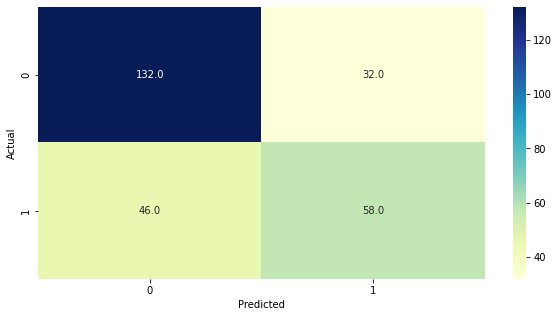

In [ ]:
# Knn model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

ML_Model=KNeighborsClassifier(n_neighbors=3,p=1)
print("model completed")

# traning
ML_Model.fit(X_train,y_train)
print("Model training completed")

# find y_pred

y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# find acc
acc=accuracy_score(y_test,y_pred)
print("Acc of k=3 :-  ",acc*100)

#KNN Eval
model_Eval(y_test,y_pred)


model completed
traning completed
y_pred completed
Accuracy :- 0.7723880597014925
Error rate :- 0.2276119402985075
Precision:- 0.774750963892671
Recall:-  0.7723880597014925
F1 score :-  0.7732978590238968
[[131  33]
 [ 28  76]]


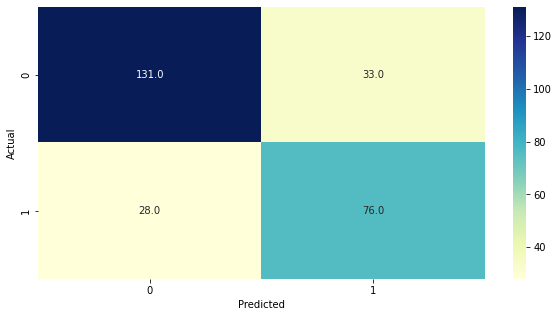

In [ ]:
# NB
from sklearn.naive_bayes import GaussianNB

ML_Model=GaussianNB()
print("model completed")

#traning
ML_Model.fit(X_train,y_train)
print("traning completed")

# y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# Eval
model_Eval(y_test,y_pred)

model completed
Model traning completed
y_pred completed
Accuracy :- 0.7723880597014925
Error rate :- 0.2276119402985075
Precision:- 0.7771564671646053
Recall:-  0.7723880597014925
F1 score :-  0.7738972962355494
[[129  35]
 [ 26  78]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


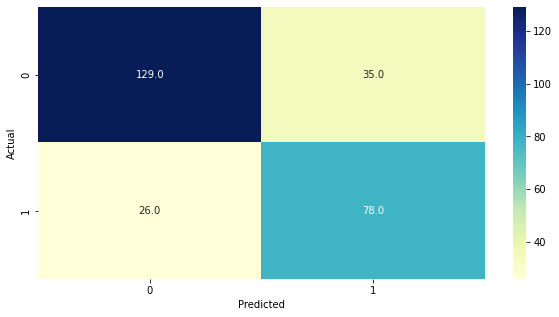

In [ ]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

ML_Model=LogisticRegression()
print("model completed")

# model traning
ML_Model.fit(X_train,y_train)
print("Model traning completed")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# LR Eval
model_Eval(y_test,y_pred)


model created
model traning completd
y_pred find
accuracy :-  63.059701492537314
Accuracy :- 0.6305970149253731
Error rate :- 0.3694029850746269
Precision:- 0.6107429965270806
Recall:-  0.6305970149253731
F1 score :-  0.5856188077871918
[[144  20]
 [ 79  25]]


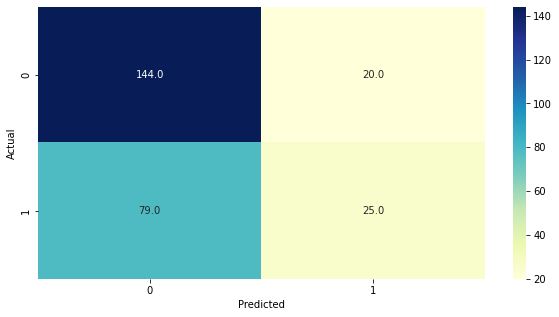

In [ ]:
# created Model for svm (rbf)
from sklearn.svm import SVC

#model creation
ML_Model=SVC(kernel="rbf")
print('model created')
# model train
ML_Model.fit(X_train,y_train)
print("model traning completd")
#find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred find")
#accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy :- ",acc*100)

# Model  Eval
model_Eval(y_test,y_pred)

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  80.22388059701493
Accuracy :- 0.8022388059701493
Error rate :- 0.1977611940298507
Precision:- 0.8034298814166239
Recall:-  0.8022388059701493
F1 score :-  0.8027319472633189
[[136  28]
 [ 25  79]]


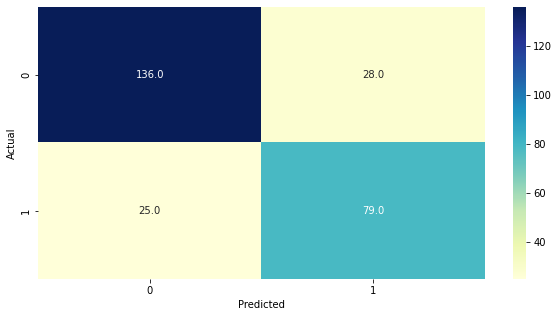

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# model creation
ML_Model=DecisionTreeClassifier()
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  77.98507462686567
Accuracy :- 0.7798507462686567
Error rate :- 0.2201492537313433
Precision:- 0.7802529857286749
Recall:-  0.7798507462686567
F1 score :-  0.7800407994704499
[[134  30]
 [ 29  75]]


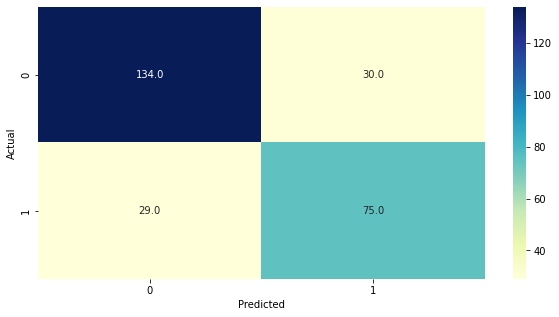

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# model creation
ML_Model=RandomForestClassifier(max_depth=2)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  76.11940298507463
Accuracy :- 0.7611940298507462
Error rate :- 0.23880597014925375
Precision:- 0.7667625644844813
Recall:-  0.7611940298507462
F1 score :-  0.7629164201495551
[[127  37]
 [ 27  77]]


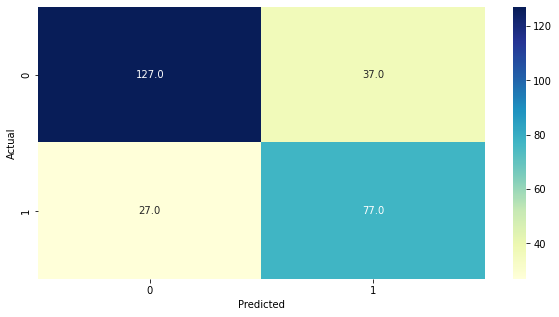

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# model creation
ML_Model=AdaBoostClassifier(n_estimators=100, random_state=0)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  78.73134328358209
Accuracy :- 0.7873134328358209
Error rate :- 0.2126865671641791
Precision:- 0.7858359270529189
Recall:-  0.7873134328358209
F1 score :-  0.7862908861364857
[[138  26]
 [ 31  73]]


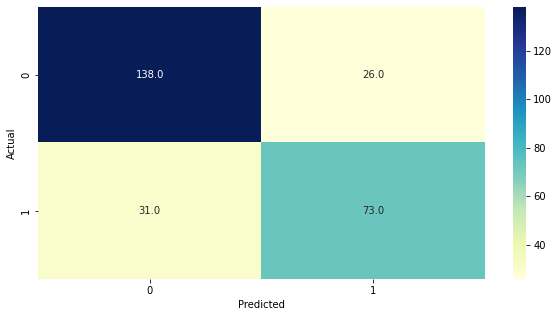

In [ ]:
#XGBoost
import xgboost as xgb

# model creation
ML_Model=xgb.XGBClassifier()
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 
mpdel created
0:	learn: 0.6549023	total: 47.5ms	remaining: 190ms
1:	learn: 0.6233669	total: 48.1ms	remaining: 72.2ms
2:	learn: 0.5978411	total: 48.9ms	remaining: 32.6ms
3:	learn: 0.5735906	total: 49.7ms	remaining: 12.4ms
4:	learn: 0.5539940	total: 50.4ms	remaining: 0us
model trained
find y_pred
Accuracy :- 0.7835820895522388
Error rate :- 0.21641791044776115
Precision:- 0.7825198541454219
Recall:-  0.7835820895522388
F1 score :-  0.7782894040436118
[[145  19]
 [ 39  65]]


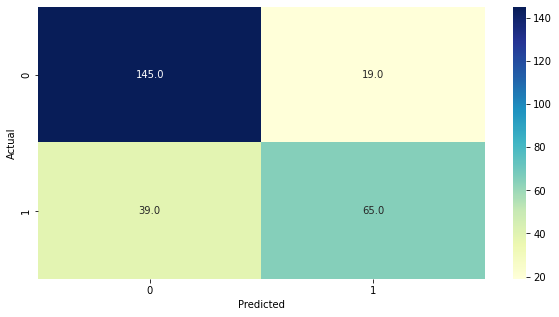

In [ ]:
#catboost
!pip install catboost
from catboost import CatBoostClassifier

# model creation
ML_Model=CatBoostClassifier(iterations=5,learning_rate=0.1)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")


# model evaluation
model_Eval(y_test,y_pred)